In [1]:
import numpy as np
import descent
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib-1.5.dev1-py3.5-macosx-10.11-x86_64.egg/matplotlib/__init__.py:867: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Logistic regression

First, we generate a toy problem instance:

In [2]:
# sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

M = 500  # number of training examples

X = np.random.randn(M,2)       # Features
W = np.array([0.25, -0.5])     # True weights
ytrue = sigmoid(X.dot(W))      # class probabilities

# noisy class labels
yobs = (ytrue + 0.1*np.random.randn(M)) > 0.5
yval = np.ones(yobs.size)*yobs - np.ones(yobs.size)*(~yobs)

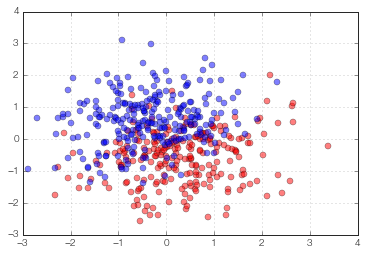

In [3]:
plt.plot(X[yobs,0], X[yobs,1], 'ro', alpha=0.5)
plt.plot(X[~yobs,0], X[~yobs,1], 'bo', alpha=0.5)

The objective function for logistic regression is:

In [4]:
def f_df(theta, X=X, y=yval):
    expval = np.exp(-yval * X.dot(theta))
    
    objective = np.mean(np.log(1 + expval)) + 0.1 * np.linalg.norm(theta)**2
    gradient = np.mean((-yval * expval / (1 + expval)).reshape(-1,1) * X, axis=0) + 0.2*theta
    return objective, gradient

In [5]:
descent.check_grad(f_df, np.random.randn(2))

------------------------------------
Numerical  | Analytic   | Error          
------------------------------------
0.3159     | 0.3159     | 0.000000 | ✔
0.8701     | 0.8701     | 0.000000 | ✔


In [6]:
opt = descent.sgd(f_df, np.zeros(2), learning_rate=1e-2)
opt.display = None
opt.run(100)
opt.theta

array([ 0.12919925, -0.23894759])

In [7]:
np.corrcoef(W, opt.theta)

array([[ 1.,  1.],
       [ 1.,  1.]])

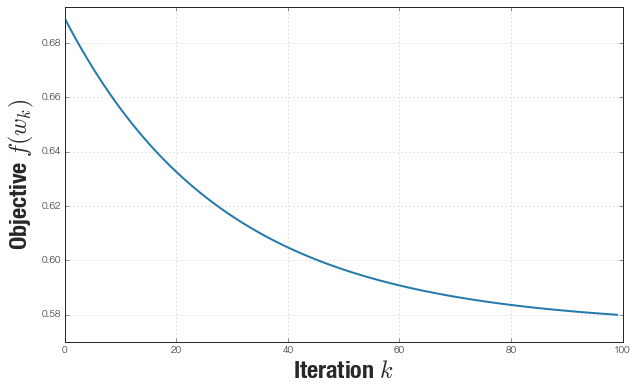

In [199]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    plt.figure(figsize=(10,6))
    opt = descent.sgd(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)

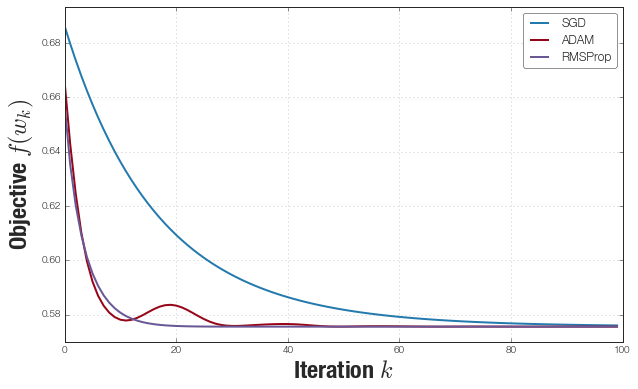

In [200]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    
    plt.figure(figsize=(10,6))
    opt = descent.sgd(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    opt = descent.adam(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    opt = descent.rmsprop(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    plt.legend(["SGD", "ADAM", "RMSProp"], loc="upper right",  frameon=True, fancybox=True)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)

In [10]:
opt

GradientDescent
100 iterations
Objective: 0.6182213091426162

In [15]:
opt.run(50)

In [16]:
opt

GradientDescent
250 iterations
Objective: 0.5803426199777876